<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №3

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

In [121]:
import ssl

Загрузить датасет по url:


In [122]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [123]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (region)         156 non-null    object 
 1   Ladder                   156 non-null    int64  
 2   SD of Ladder             156 non-null    int64  
 3   Positive affect          155 non-null    float64
 4   Negative affect          155 non-null    float64
 5   Social support           155 non-null    float64
 6   Freedom                  155 non-null    float64
 7   Corruption               148 non-null    float64
 8   Generosity               155 non-null    float64
 9   Log of GDP
per capita    152 non-null    float64
 10  Healthy life
expectancy  150 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [125]:
# df.loc[df['Country (region)']=='Russia']

In [126]:
df_1 = df.dropna()

Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

In [127]:
# df_1.Freedom.nunique()

In [128]:
# len(df_1.Freedom)

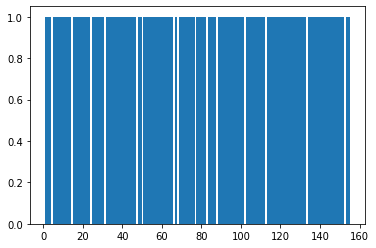

In [129]:
plt.hist(df_1.Freedom, 155)
plt.show()

In [130]:
# df_1.Freedom.unique()

In [131]:
# df_1.Freedom.plot(kind='box')

In [132]:
# x = df_1.Freedom.value_counts()
# x.sort_values()
# x

In [133]:
# df_1['Positive affect'].nunique()

In [134]:
# len(df_1['Positive affect'])

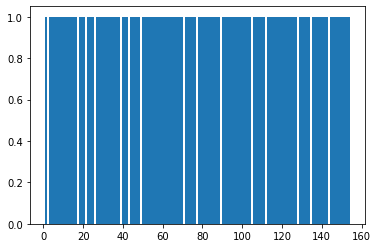

In [135]:
plt.hist(df_1['Positive affect'], 155)
plt.show()

In [136]:
# Оба частотных графика похожи на равномерное распределение

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [137]:
# среднее значение(математическое ожидание)

In [138]:
df_1.Freedom.mean()

78.82857142857142

In [139]:
# медиана

In [140]:
statistics.median(df_1.Freedom)

79.5

In [141]:
# мода

In [142]:
statistics.mode(df_1.Freedom)

StatisticsError: no unique mode; found 140 equally common values

In [143]:
# стандартное отклонение

In [144]:
statistics.pstdev(df_1.Freedom)

44.9475794449399

In [145]:
def stdev(nums):
    diffs = 0
    # считаем среднее значение
    avg = sum(nums)/len(nums)
    for n in nums:
        # считаем сумму квадратичных отклонений
        diffs += (n - avg)**(2)
    # считаем корень среднеквадратичного значения
    return (diffs/(len(nums)-1))**(0.5)

print(stdev(df_1.Freedom))

45.108971631877274


In [146]:
# дисперсия

In [147]:
statistics.pvariance(df_1.Freedom)

2020.2848979591836

In [148]:
statistics.pstdev(df_1.Freedom)**2

2020.2848979591836

In [149]:
# минимум и максимум

In [150]:
df_1.Freedom.min()

1.0

In [151]:
df_1.Freedom.max()

155.0

In [152]:
# выбросы

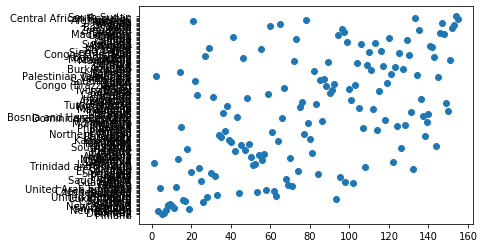

In [153]:
plt.scatter(df.Freedom, df['Country (region)'])

In [154]:
# явных выбросов нет

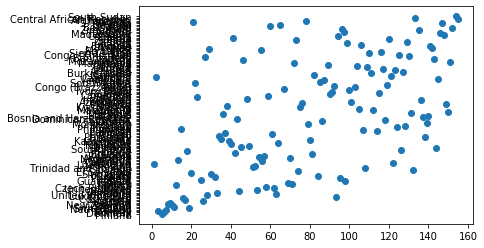

In [155]:
plt.scatter(df_1.Freedom, df_1['Country (region)'])

In [156]:
# размах

In [157]:
df_range = df_1.Freedom.max() - df_1.Freedom.min()
df_range

154.0

Почему нельзя найти моду?

In [158]:
# моду не удается найти, так как все значения столбца уникальны
x = df_1.Freedom.nunique()
x

140

In [159]:
x == len(df_1.Freedom)

True

In [160]:
df_1.Freedom.unique()

array([  5.,   6.,   3.,   7.,  19.,  11.,  10.,   8.,   9.,  26.,  17.,
        16.,  93.,  28.,  63.,  33.,  44.,  53.,  62.,  58.,  12.,  71.,
        69.,  98.,  25.,  95.,  32.,  84.,  30.,  20.,  74., 132., 108.,
        51.,  52.,   1., 122.,  56.,  13.,  70.,  54.,  57.,  81.,  42.,
        18., 126., 144.,  45.,  49.,  40.,  64.,  39.,  80.,  35., 138.,
        34.,  61.,  37., 114., 107.,  15., 124., 128.,  79., 139.,  86.,
       118.,  43., 137., 140.,  36., 131., 150., 112., 105.,  75.,  38.,
       149.,  76., 101., 136.,  48.,  23.,  59.,  90., 115.,  91., 100.,
        67., 103.,  92., 119.,  22.,  85.,  87., 145.,   2., 121.,  82.,
       111., 127., 123., 117., 109., 104.,  89.,  72., 151.,  46., 143.,
        27., 130., 125., 110., 116.,  55.,  29., 142., 141., 106.,  99.,
       129.,  73., 120.,  41.,  94., 148., 146.,  97., 135.,  96., 152.,
        60.,  65., 147.,  21.,  78., 155., 133., 154.])

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

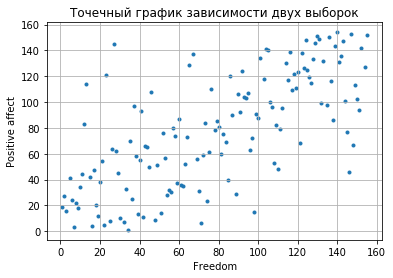

In [161]:
plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.title('Точечный график зависимости двух выборок')
plt.grid(True)
plt.scatter(df_1['Freedom'], df_1['Positive affect'], marker='.')

In [162]:
from scipy.stats import pearsonr

In [163]:
corr, p_value = pearsonr(df_1['Freedom'], df_1['Positive affect'])

In [164]:
corr

0.6965670458090685

In [165]:
# Наблюдается небольшая прямая зависимость величин (знак коэффициента положительный)

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [166]:
min(df_1['Freedom'])

1.0

In [167]:
max(df_1['Freedom'])

155.0

In [168]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(df_1[['Freedom']])
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0
0,-0.948052
1,-0.935065
2,-0.974026
3,-0.922078
4,-0.766234


In [169]:
df_norm.min()

0   -1.0
dtype: float64

In [170]:
df_norm.max()

0    1.0
dtype: float64

In [171]:
df_norm.mean()

0    0.010761
dtype: float64

Построить матрицу корреляций для всех колонок таблицы

In [172]:
import seaborn as sns

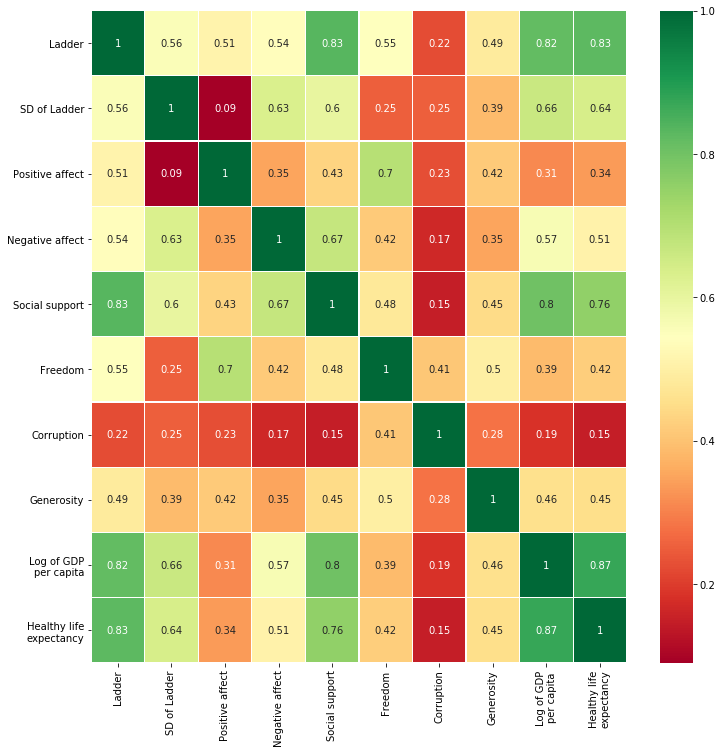

In [173]:
sns.heatmap(df_1.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо: 

In [174]:
df_2=pd.read_csv('data/avocado.csv')
df_2[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

In [175]:
df_2['AveragePrice'].nunique()

259

In [176]:
len(df_2['AveragePrice'])

18249

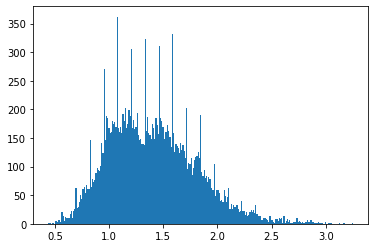

In [177]:
plt.hist(df_2['AveragePrice'], 259)
plt.show()

In [178]:
# Похоже на нормальное распределение

In [179]:
# df_2['AveragePrice'].mean()

In [180]:
# df_2['4046'].mean()

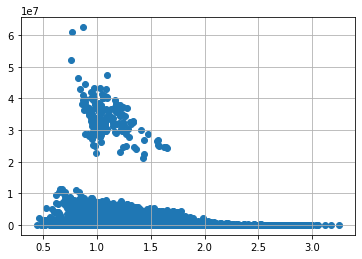

In [181]:
x = df_2['AveragePrice']
y = df_2['Total Volume']
plt.grid(True)
plt.scatter(x, y)

In [182]:
from scipy.stats import pearsonr

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [183]:
corr_1, p_value_1 = pearsonr(df_2['AveragePrice'], df_2['4046'])

In [184]:
corr_1

-0.2083170484878848

In [185]:
corr_2, p_value_2 = pearsonr(df_2['AveragePrice'], df_2['4225'])

In [186]:
corr_2

-0.1729277725093354

In [187]:
corr_3, p_value_3 = pearsonr(df_2['AveragePrice'], df_2['4770'])

In [188]:
corr_3

-0.17944598397975622

In [189]:
# наблюдается слабая обратная корреляция, зависимость количества проданных авокадо обратно пропорционально цене,
# но глядя на график зависимости количества проданных авокадо от цены, то линейной зависимости нет,
# поэтому коэффициент Пирсона здесь не совсем объективен, возможно данные распределены не нормально

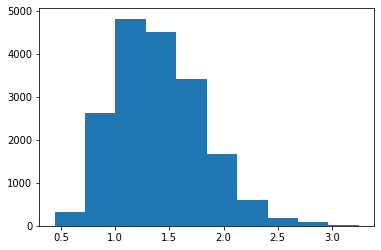

In [190]:
plt.hist(x, 10)
plt.show()

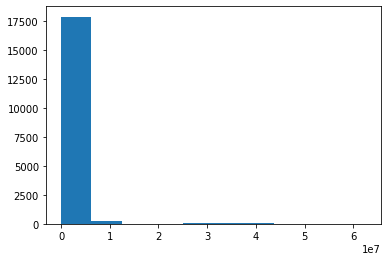

In [191]:
plt.hist(y, 10)
plt.show()

In [192]:
# количество проданных авокадо имеет равномерное распределение

In [193]:
coef_1, p_1 = sts.spearmanr(df_2['AveragePrice'], df_2['4225'])
# print('Spearmans correlation coefficient: %.3f' % coef)

coef_2, p_2 = sts.kendalltau(df_2['AveragePrice'], df_2['4225'])
# print('Kendall correlation coefficient: %.3f' % coef)

In [194]:
coef_1

-0.5137317111506706

In [195]:
coef_2

-0.3435807984144691